<div>
  <img style="float: left;"  width="140" src=" 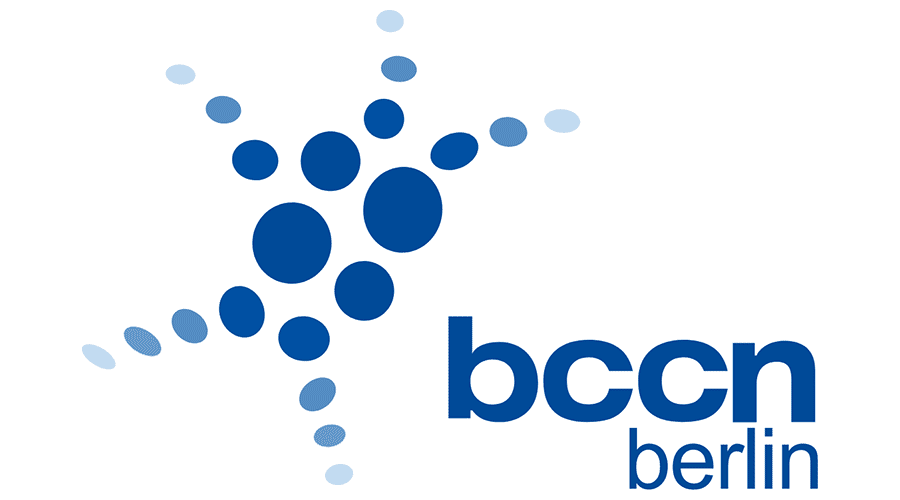">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Denis Alevi
    <br>(denis.alevi@bccn-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (a single `.ipynb`). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

In [5]:
NAMES = ["", ""]
GROUP = ""

In [6]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

# Week 7: Reinforcement Learning I

In [7]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt

# Import functions defined in the ./helpers.py file
from helpers import assert_var_defined

In [8]:
# You can add your additional package imports here

# Create plots inline in the Jupyter notebook
%matplotlib inline


## Exercise 1: The 10-armed bandit

In this exercise we will test multiple policies that are supposed to learn the optimal strategy for a 10-armed bandit. A 10-armed bandit is a machine consisting of 10 levers and a reward distribution device, e.g., a chocolate dispenser. Each lever has a fixed probability of generating a reward of 1 (piece of chocolate) when operated. At the beginning, the "agent" does not know anything about the machine, but while activating different levers,
she will learn more and more about the reward characteristics. While one aim is to get a good estimate of the reward probabilities by playing around (exploration), the agent concurrently intends to maximize the overall chocolate output (exploitation). The tricky question is: What is a good strategy that balances exploration and exploitation? Which levers should be activated given the reward history?


All strategies in this exercise rely on a common idea: The agent assigns a so-called $Q$-value $Q(a_{i}) = Q_{i}$ to each of the possible actions $a_{i}$ (press lever i). Ideally, the $Q$-values
mirror the expected reward associated with each action. After pressing a lever, the action values are updated depending on whether a reward was received ($R = 1$) or not ($R = 0$):

$$
\Delta Q_{i} = \eta [R-Q_{i}]
$$

The parameter $\eta$ represents the learning rate.

### 1 .1) Generate reward probabilities (0 points)

Generate an array `p` of 10 random lever reward probabilities $p_{i} \in [0,0.9]$ and **keep it fixed for the entire exercise sheet**.

In [9]:
# YOUR CODE HERE
p = np.random.uniform(0,0.9,10)

In [10]:
""" Test that variable `p` is defined """

assert_var_defined("p")

### 1.2) Implemente an N-armed bandit (0.5 points)

Write a function `generate_reward` that will behave as an N-armed bandit (given lever numbers corresponding to indices into `p`, it returns rewards of 1 with a probability $p_{i}$ , otherwise zeros).
Confirm that your bandit works: Activate each lever 10000 times and compare the mean reward for each lever with its reward probability – they should be nearly identical.

In [122]:
def generate_reward(lever_idx, prob=p):
    r = np.random.random()
    idx =  prob[lever_idx] > r
    ret = np.zeros_like(lever_idx)
    ret[idx] = 1
    return ret

In [123]:
""" Test that function `generate_reward` is defined """

assert_var_defined("generate_reward", func=True)

#### 1.2 b) Test your reward function


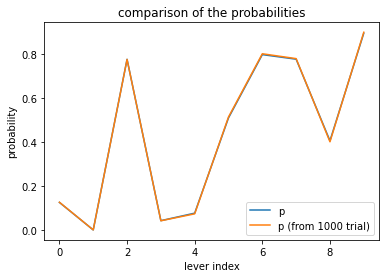

In [107]:
rewards = np.zeros_like(p)
for  i in range(p.shape[0]):
    for n in range(10000):
        rewards[i] += generate_reward(i, prob=p)

rewards = rewards/10000

plt.plot(p, label='p')
plt.plot(rewards, label='p (from 1000 trial)')
plt.title('comparison of the probabilities')
plt.xlabel('lever index')
plt.ylabel('probability')
plt.legend()
plt.show()

### 1.3) Device some method of storing and updating the $Q$-values (1 point)

Devise some method of storing and updating the $Q_{i}$ value associated with the action of pressing lever i (take $\eta$ = 0.01). Q should be initialized with zeros, since the agent is pessimistic and initially associates zero value with each action.


In [108]:
# YOUR CODE HERE
def q_update(cur_q, rewards, update_idx, eta=0.01):
    del_q = eta * (rewards - cur_q[update_idx])
    cur_q[update_idx] += np.abs(del_q)
    return cur_q

### 1.4) Implement the *$\epsilon$-greedy* policy (1 point)

We will first implement the $\epsilon$-greedy policy: The agent will with probability $1 − \epsilon$ press the lever which has the maximum associated Q-value (if there are several with that value, press them all), otherwise press a random lever. The agent starts by pressing all levers (since they all have the same Q-value initially), it updates the Q-values and then applies the described strategy iteratively. 

Write a function `eps_greedy` that implements this strategy. 

The function should accept as input the current $Q$ and should return the lever index (or indices)
that are to be pressed, the Q-value of the chosen lever, as well as the largest Q-value.

In [116]:
# YOUR CODE HERE
def eps_greedy(cur_q, eps):
    pr = np.random.random()

    #j_max = np.argmax(cur_q) # return the first max number only
    j_max = np.argwhere(cur_q == np.amax(cur_q)).ravel() # return all max value

    if pr < eps:
        j = np.random.choice(cur_q.shape[0])
    else:
        j = j_max
    
    return j, cur_q[j], cur_q[j_max]

### 1.5) Test the pure-greedy algorithm (2 points)

#### 1.5 a) Implement the algorithm (1 point)
First we'll test the pure-greedy algorithm. Write a function that sets $\epsilon = 0$ and runns 1000 iterations of the algorithm: 
  1. Choose the next lever(s) (`eps_greedy`).
  2. Activate the chosen levers (`generate_reward`).
  3. Update the Q-values according to the received rewards.


In [120]:
def run_eps_greedy(eps=0, num_iter=10000):

    cur_q = np.zeros_like(p)
    rewards = np.zeros(num_iter)

    for i in range(num_iter):
        j, choosen_q, max_q = eps_greedy(cur_q, eps)
        print(j.shape)
        r = generate_reward(j)
        cur_q[j] = q_update(choosen_q, r, j)
        rewards[i] =  np.sum(max_q)

    return rewards

#### 1.5 b) Plot the eximated expecte rewards for 20 "lives" (0.5 points)

Plot the estimated expected reward (the Q-value of the current lever) against the trial number (each lever press constitutes one trial).

Repeat the test 20 times and draw the resulting curves into a single plot.


In [121]:
rewards = run_eps_greedy()
plt.plot(rewards.T)

(10,)
(1,)


IndexError: index 9 is out of bounds for axis 0 with size 1

#### 1.5 c) Discuss your results (0.5 points)

Does the agent consistently identify the levers with the largest reward probabilities?

YOUR ANSWER HERE

### 1.6) Test the $\epsilon$-greedy algorithm

#### 1.6 a) Simulate the algorithm for different $\epsilon$ values (2 points)

Run 100 repetitions ("lives") of the $\epsilon$-greedy strategy (with four different $\epsilon$-values 0.0, 0.01, 0.1 and 0.5) at 1000 iterations each and store the expected reward in each trial. 


Plot the average of the expected reward, and the average largest Q-value across lives against the trial number. Include a line in the plot that runs parallel to the x-axis and represents the maximum expected reward (the maximum reward probability). 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.6b) Discuss your results (2 points)

Why do the expected reward and largest Q-value curves look the way they do for the four cases?

YOUR ANSWER HERE

### 1.7 Implement a *SoftMax* policy

Finally, we program a *SoftMax* policy: The agent presses the levers with probabilities that depend on the Q-values:

$$
P_{i} = \frac{\exp(\beta Q_i)}{\sum_j\exp(\beta Q_{j})}
$$



#### 1.7a) Write a function that implements the policy (1 point)

Write a function `softmax` that implements this strategy. The function/method should accept as input the current Q and output the lever index(it will always be a single lever index!) that is to be pressed, as well as the maximum Q-value.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.7 b) Simulate the *SoftMax* strategy for different $\beta$ (1.5 points)

Test this function by running 100 lives with 5000 iterations each and store the expected reward and maximum Q-value in each trial. 

Draw the same curves as in task 1.6 for different values of  $\beta$  = 1, 5, 15, 50.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.7c) Discuss your results (1 point)

Do the results of SoftMax show any improvements compared to the $\epsilon$-greedy policies? 


YOUR ANSWER HERE

#### 1.7 d) Explain the $\beta$-parameter (1 point)

How does the parameter $\beta$ relate to the exploration/exploitation-balance? 

YOUR ANSWER HERE

#### 1.7 e) Explain your results (1 points)

And once again explain why for each $\beta$ the two curves (expected reward & largest Q-value) look the way they do.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### 1.8) Add a catastrophic action

#### 1.8 a) Modify your bandit and test your policies (1 point)
Modify the 10-armed bandit so that operating the last lever always gives a reward of -5000 (the agent is punished and has to return 5000 pieces of chocolate). 

Test both the epsilon-greedy and SoftMax policies on this modified bandit (use $\epsilon$ = 0.1, $\beta$ = 15) by running 500 lives with 1000 iterations each and plot the same curve as in task 6.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.8 b) Discuss your results (1 point)

Do you observe a difference? Give an intuition for the result! (After this task ditch the punishment and return to the original bandit.)

YOUR ANSWER HERE

### 1.9) Implement a *modified SoftMax* policy with dynamic $\beta$

#### 1.9 a) Implemente the new policy (1 point)

Implement a modified SoftMax policy, where the parameter $\beta$ increases linearly with the number of iterations i starting at a value of 1:

$$
\beta(i) = 1 + \frac{i}{b}
$$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.9 b) Test the policy for different $\beta$-slopes (0.5 points)

Run the simulations with 5 different $\beta$-slopes: b = 0.1, 0.4, 1.6, 6.4, 25.6. and also with the simple SoftMax ($\beta$ = 5).
In each simulation, run 100 lives with 2000 iterations and plot the same curves as in task 6.

How are the plots with different $\beta$-slopes different from the simple SoftMax simulation?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

#### 1.9 c) Plot the cumulative sum of true rewards (0.5)

In a different figure, plot the cumulative sum of true rewards (the sum of rewards until the current trial, aver-
aged over lives) against trial number.

What do you observe?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

#### 1.9 d) Plot the cumulative reward against $\beta$-slope (0.5 points)

Furthermore, plot the cumulative reward at the end of the lifetime (2000 iterations) against the $\beta$-slope.

Which of the five slopes generates the maximum overall reward?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

#### 1.9 e) Discuss the idea behind using a varying $\beta$ (1 point)

Explain the idea behind using a varying β, in particular regarding the exploration/exploitation dilemma?

Can you think of a similar modification to the  $\epsilon$-greedy policy?

YOUR ANSWER HERE